This notebook requires the following Github repo https://github.com/brainchart/Lifespan/tree/4a6faa19b8fb7e11e2173fe11998ab3b87c8c5b4

In [ ]:
# install.packages("gamlss")

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
source("100.common-variables.r")
source("101.common-functions.r")

source("300.variables.r")
source("301.functions.r")

Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: parallel

 **********   GAMLSS Version 5.4-22  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.


Warning message in eval(ei, envir):
“Have set a fixed random seed, all runs will be identical unless this is changed (may be good or bad, depending on what you want)”


In [3]:
# FIT <- readRDS("Share/OriginalModels/FIT_GMV.rds")
FIT <- readRDS("Share/OriginalModels/FIT_WMV.rds")

In [ ]:
# FIT$param

In [ ]:
# age_range <- seq(log(365*.25),log(365*35),length.out=2^6)
# age_range <- log(seq(.5,40)*365)
age_range = seq(log(180),log(365*50),length.out=2^5)

# POP.CURVE.LIST <- list(AgeTransformed=seq(log(90),log(365*95),length.out=2^4),sex=c("Female","Male"))
POP.CURVE.LIST <- list(AgeTransformed=age_range,sex=c("Female","Male"))
POP.CURVE.RAW <- do.call( what=expand.grid, args=POP.CURVE.LIST )

CURVE <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT$param )

exp(age_range)/365

Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“variable 'fs_version' is absent, its contrast will be ignored”


In [ ]:
head(CURVE)

In [15]:
set.seed(1234)

# Used to verify that the rnorm(n(), 0, sqrt(abs(PRED.variance.pop.D))) in below worked as expected
# for(i in 1:nrow(CURVE)) {
#   CURVE$sim_noisy_mean[i] <- CURVE$PRED.mean.pop.D[i] + rnorm(1, 0, sqrt(abs(CURVE$PRED.variance.pop.D[i])))
# }

sim_data = CURVE |>
    select(AgeTransformed, PRED.mean.pop.D, PRED.variance.pop.D , sex) |>
    mutate(sim_noisy_mean = PRED.mean.pop.D + rnorm(n(), 0, sqrt(abs(PRED.variance.pop.D))),
           age_in_years = exp(AgeTransformed)/365) |>
    na.omit()

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `sim_noisy_mean = PRED.mean.pop.D + rnorm(n(), 0,
  sqrt(abs(PRED.variance.pop.D)))`.
Caused by warning in `rnorm()`:
! NAs produced”


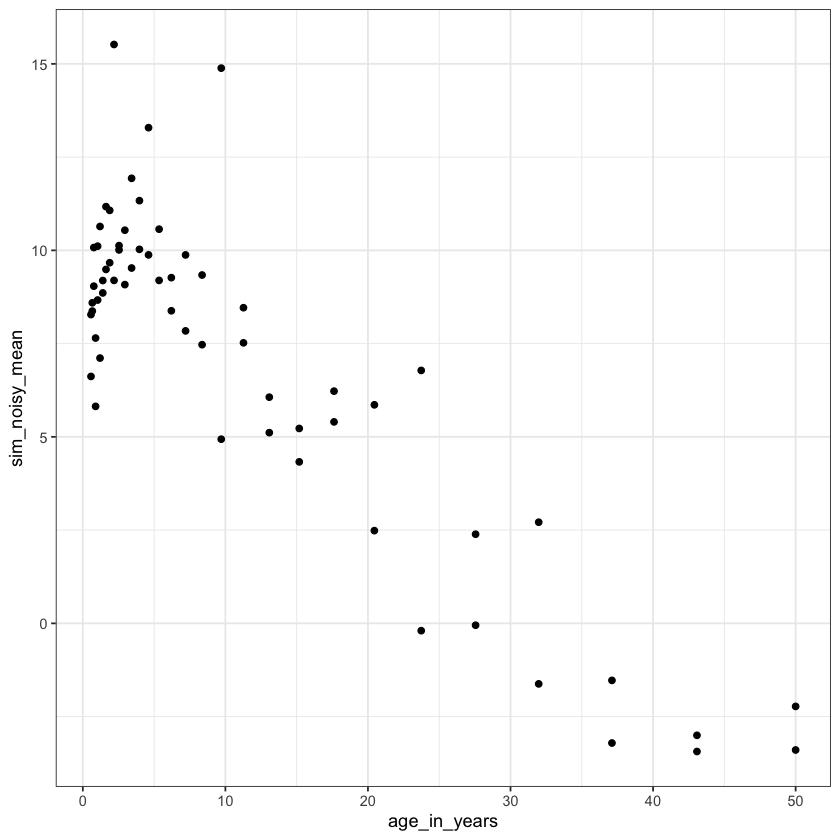

In [16]:
sim_data |>
    # ggplot(aes(x=age_in_years, y=sim_noisy_mean, color = sex)) +
    ggplot(aes(x=age_in_years, y=sim_noisy_mean)) +
    geom_point()+
    theme_bw()

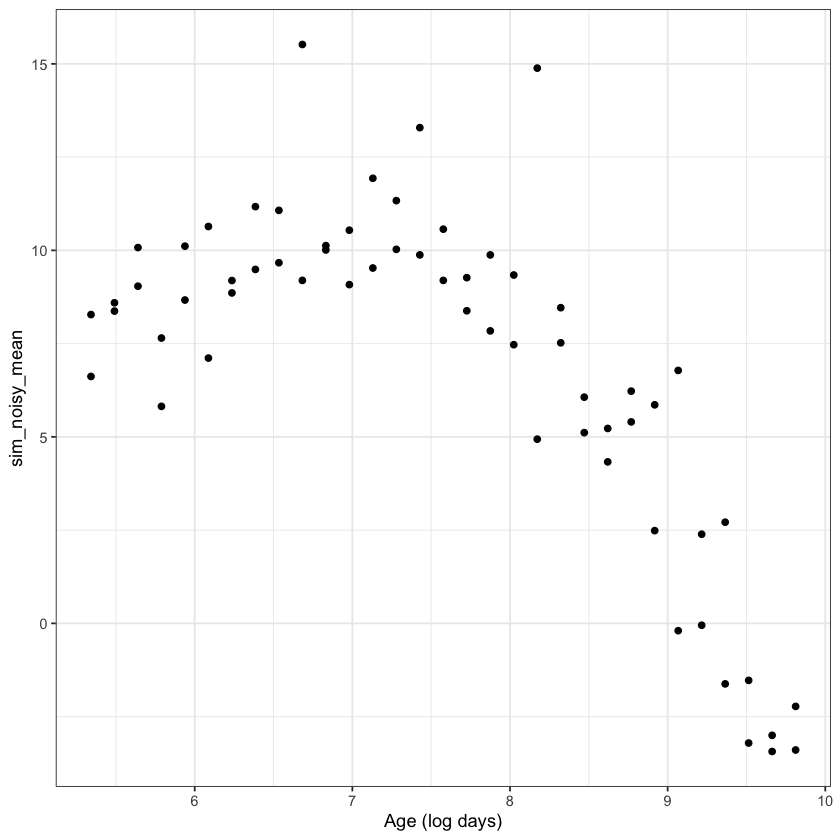

In [17]:
sim_data |>
# ggplot(aes(x=AgeTransformed, y=sim_noisy_mean, color = sex)) +
    ggplot() +
    geom_point(aes(x=AgeTransformed, y=sim_noisy_mean))+
    # geom_line(aes(x=AgeTransformed, y=PRED.mean.pop.D, color=sex)) +
    theme_bw()+
    xlab("Age (log days)")

In [18]:
sim_data

,AgeTransformed,PRED.mean.pop.D,PRED.variance.pop.D,sex,sim_noisy_mean,age_in_years
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2,5.341956,7.85072086,1.0397187,Female,6.6199170,0.5723860
3,5.490954,8.27311080,1.3417096,Female,8.5944632,0.6643522
4,5.639953,8.68626723,1.6413982,Female,10.0756214,0.7710947
5,5.788952,9.08651233,1.9421355,Female,5.8175358,0.8949878
6,5.937951,9.46965743,2.2465042,Female,10.1128442,1.0387869
7,6.086950,9.83095327,2.5562732,Female,10.6400531,1.2056905
8,6.235949,10.16506887,2.8723695,Female,9.1909958,1.3994108
9,6.384947,10.46609644,3.1948447,Female,9.4890396,1.6242563
10,6.533946,10.72758099,3.5228265,Female,9.6681501,1.8852283


In [44]:
# age_range <- seq(log(365*.25),log(365*35),length.out=2^6)
age_range <- log(seq(.5,55, 0.01)*365)
# age_range = seq(log(180),log(365*50),length.out=2^5)
# POP.CURVE.LIST <- list(AgeTransformed=seq(log(90),log(365*95),length.out=2^4),sex=c("Female","Male"))

POP.CURVE.LIST <- list(AgeTransformed=age_range,sex=c("Female","Male"))
POP.CURVE.RAW <- do.call( what=expand.grid, args=POP.CURVE.LIST )

CURVE <- Apply.Param(NEWData=POP.CURVE.RAW, FITParam=FIT$param )

exp(age_range)/365

Warning message in model.matrix.default(Model.Formula, Model.Frame, contrasts.arg = FITParam$contrasts, :
“variable 'fs_version' is absent, its contrast will be ignored”


[1]  0.50  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.60  0.61
  [13]  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.70  0.71  0.72  0.73
  [25]  0.74  0.75  0.76  0.77  0.78  0.79  0.80  0.81  0.82  0.83  0.84  0.85
  [37]  0.86  0.87  0.88  0.89  0.90  0.91  0.92  0.93  0.94  0.95  0.96  0.97
  [49]  0.98  0.99  1.00  1.01  1.02  1.03  1.04  1.05  1.06  1.07  1.08  1.09
  [61]  1.10  1.11  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19  1.20  1.21
  [73]  1.22  1.23  1.24  1.25  1.26  1.27  1.28  1.29  1.30  1.31  1.32  1.33
  [85]  1.34  1.35  1.36  1.37  1.38  1.39  1.40  1.41  1.42  1.43  1.44  1.45
  [97]  1.46  1.47  1.48  1.49  1.50  1.51  1.52  1.53  1.54  1.55  1.56  1.57
 [109]  1.58  1.59  1.60  1.61  1.62  1.63  1.64  1.65  1.66  1.67  1.68  1.69
 [121]  1.70  1.71  1.72  1.73  1.74  1.75  1.76  1.77  1.78  1.79  1.80  1.81
 [133]  1.82  1.83  1.84  1.85  1.86  1.87  1.88  1.89  1.90  1.91  1.92  1.93
 [145]  1.94  1.95  1.96  1.97  1.98  1.99  2.00  2.01  2.02  2.03  2.04  2.05
 [157]  2.06  2.07  2.08  2.09  2.10  2.11  2.12  2.13  2.14  2.15  2.16  2.17
 [169]  2.18  2.19  2.20  2.21  2.22  2.23  2.24  2.25  2.26  2.27  2.28  2.29
 [181]  2.30  2.31  2.32  2.33  2.34  2.35  2.36  2.37  2.38  2.39  2.40  2.41
 [193]  2.42  2.43  2.44  2.45  2.46  2.47  2.48  2.49  2.50  2.51  2.52  2.53
 [205]  2.54  2.55  2.56  2.57  2.58  2.59  2.60  2.61  2.62  2.63  2.64  2.65
 [217]  2.66  2.67  2.68  2.69  2.70  2.71  2.72  2.73  2.74  2.75  2.76  2.77
 [229]  2.78  2.79  2.80  2.81  2.82  2.83  2.84  2.85  2.86  2.87  2.88  2.89
 [241]  2.90  2.91  2.92  2.93  2.94  2.95  2.96  2.97  2.98  2.99  3.00  3.01
 [253]  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09  3.10  3.11  3.12  3.13
 [265]  3.14  3.15  3.16  3.17  3.18  3.19  3.20  3.21  3.22  3.23  3.24  3.25
 [277]  3.26  3.27  3.28  3.29  3.30  3.31  3.32  3.33  3.34  3.35  3.36  3.37
 [289]  3.38  3.39  3.40  3.41  3.42  3.43  3.44  3.45  3.46  3.47  3.48  3.49
 [301]  3.50  3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58  3.59  3.60  3.61
 [313]  3.62  3.63  3.64  3.65  3.66  3.67  3.68  3.69  3.70  3.71  3.72  3.73
 [325]  3.74  3.75  3.76  3.77  3.78  3.79  3.80  3.81  3.82  3.83  3.84  3.85
 [337]  3.86  3.87  3.88  3.89  3.90  3.91  3.92  3.93  3.94  3.95  3.96  3.97
 [349]  3.98  3.99  4.00  4.01  4.02  4.03  4.04  4.05  4.06  4.07  4.08  4.09
 [361]  4.10  4.11  4.12  4.13  4.14  4.15  4.16  4.17  4.18  4.19  4.20  4.21
 [373]  4.22  4.23  4.24  4.25  4.26  4.27  4.28  4.29  4.30  4.31  4.32  4.33
 [385]  4.34  4.35  4.36  4.37  4.38  4.39  4.40  4.41  4.42  4.43  4.44  4.45
 [397]  4.46  4.47  4.48  4.49  4.50  4.51  4.52  4.53  4.54  4.55  4.56  4.57
 [409]  4.58  4.59  4.60  4.61  4.62  4.63  4.64  4.65  4.66  4.67  4.68  4.69
 [421]  4.70  4.71  4.72  4.73  4.74  4.75  4.76  4.77  4.78  4.79  4.80  4.81
 [433]  4.82  4.83  4.84  4.85  4.86  4.87  4.88  4.89  4.90  4.91  4.92  4.93
 [445]  4.94  4.95  4.96  4.97  4.98  4.99  5.00  5.01  5.02  5.03  5.04  5.05
 [457]  5.06  5.07  5.08  5.09  5.10  5.11  5.12  5.13  5.14  5.15  5.16  5.17
 [469]  5.18  5.19  5.20  5.21  5.22  5.23  5.24  5.25  5.26  5.27  5.28  5.29
 [481]  5.30  5.31  5.32  5.33  5.34  5.35  5.36  5.37  5.38  5.39  5.40  5.41
 [493]  5.42  5.43  5.44  5.45  5.46  5.47  5.48  5.49  5.50  5.51  5.52  5.53
 [505]  5.54  5.55  5.56  5.57  5.58  5.59  5.60  5.61  5.62  5.63  5.64  5.65
 [517]  5.66  5.67  5.68  5.69  5.70  5.71  5.72  5.73  5.74  5.75  5.76  5.77
 [529]  5.78  5.79  5.80  5.81  5.82  5.83  5.84  5.85  5.86  5.87  5.88  5.89
 [541]  5.90  5.91  5.92  5.93  5.94  5.95  5.96  5.97  5.98  5.99  6.00  6.01
 [553]  6.02  6.03  6.04  6.05  6.06  6.07  6.08  6.09  6.10  6.11  6.12  6.13
 [565]  6.14  6.15  6.16  6.17  6.18  6.19  6.20  6.21  6.22  6.23  6.24  6.25
 [577]  6.26  6.27  6.28  6.29  6.30  6.31  6.32  6.33  6.34  6.35  6.36  6.37
 [589]  6.38  6.39  6.40  6.41  6.42  6.43  6.44  6.45  6.46  6.47  6.48  6.49
 [601]  6.50  6.51  6.52  6.53  6.54  6.55  6.56  6.5

In [46]:
length(age_range)

[1] 5451

In [47]:
set.seed(1234)

sim_data_big = CURVE |>
    select(AgeTransformed, PRED.mean.pop.D, PRED.variance.pop.D , sex) |>
    na.omit()

# sim_data_big <- do.call(rbind, replicate(120, sim_data_big, simplify = FALSE))

sim_data_big = sim_data_big |>
    mutate(sim_noisy_mean = PRED.mean.pop.D + rnorm(n(), 0, sqrt(abs(PRED.variance.pop.D))),
           age_in_years = exp(AgeTransformed)/365)
    

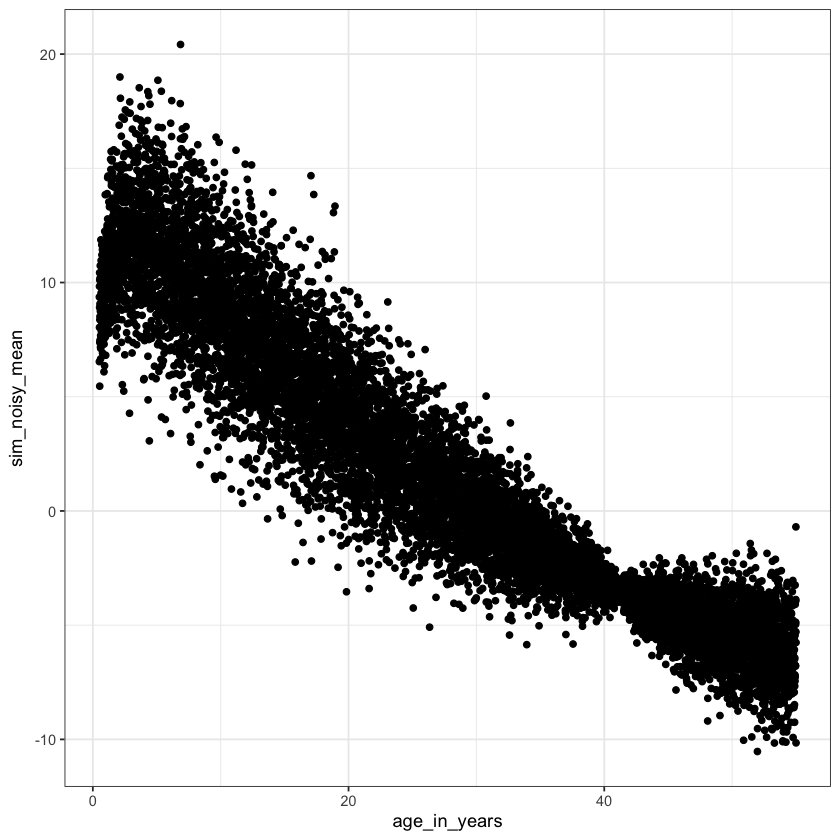

In [48]:
sim_data_big |>
    # ggplot(aes(x=age_in_years, y=sim_noisy_mean, color = sex)) +
    ggplot(aes(x=age_in_years, y=sim_noisy_mean)) +
    geom_point()+
    theme_bw()

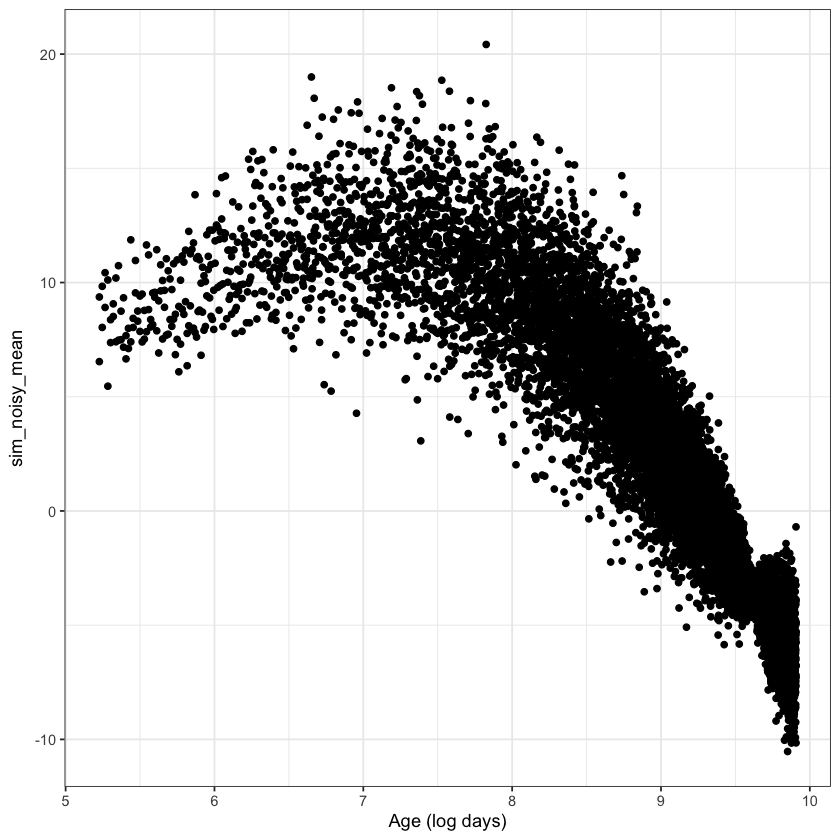

In [49]:
sim_data_big |>
# ggplot(aes(x=AgeTransformed, y=sim_noisy_mean, color = sex)) +
    ggplot() +
    geom_point(aes(x=AgeTransformed, y=sim_noisy_mean))+
    # geom_line(aes(x=AgeTransformed, y=PRED.mean.pop.D, color=sex)) +
    theme_bw()+
    xlab("Age (log days)")

In [50]:
nrow(sim_data_big)

[1] 10900

In [52]:
sim_data |>
    select(AgeTransformed, age_in_years, sex, sim_noisy_mean) |>
    rename(age_log_days = AgeTransformed,
           age_years = age_in_years,
           white_matter_volume = sim_noisy_mean) |>
    write.csv("brain_charts_whiteMatterVolume_small.csv", row.names = FALSE)

In [ ]:
sim_data_big |>
    select(AgeTransformed, age_in_years, sex, sim_noisy_mean) |>
    rename(age_log_days = AgeTransformed,
           age_years = age_in_years,
           white_matter_volume = sim_noisy_mean) |>
    write.csv("brain_charts_whiteMatterVolume_big.csv", row.names = FALSE)